In [1]:
## Getting all the packages:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
## Getting the data
data = pd.read_csv("car_data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
## Checking if any data is missing:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
# Checking how many records corresspond to each categorical feature.

print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [5]:
# encoding the categorical data such that text is converting into numbers:
data.replace({'Fuel_Type':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
data.replace({'Seller_Type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
data.head()

/var/folders/7m/x_cpspc92hs64dmdlp0lv5qm0000gn/T/ipykernel_30617/1721206139.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Fuel_Type':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
/var/folders/7m/x_cpspc92hs64dmdlp0lv5qm0000gn/T/ipykernel_30617/1721206139.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Seller_Type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
/var/folders/7m/x_cpspc92hs64dmdlp0lv5qm0000gn/T/ipykernel_30617/1721206139.py:4: FutureWarnin

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,0,0
1,sx4,2013,4.75,9.54,43000,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,1,1,0,0
3,wagon r,2011,2.85,4.15,5200,1,1,0,0
4,swift,2014,4.60,6.87,42450,0,1,0,0


In [6]:
# Splitting data:

# Y is the target feature, and X are features we will be using to predict Y.
Y = data['Selling_Price']
X = data.drop(['Car_Name','Selling_Price'],axis=1)

# Training and Test data:
x_train, x_test, y_train, y_test =  train_test_split(X,Y,test_size=0.1,random_state=2)

In [7]:
# Model Training using Linear Regression:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train,y_train)

# Predict on training data:
train_predict = lin_reg_model.predict(x_train)

In [8]:
# R squared error:
error = metrics.r2_score(y_train,train_predict)
print("R squared error is",error)

R squared error is 0.8824621379730495


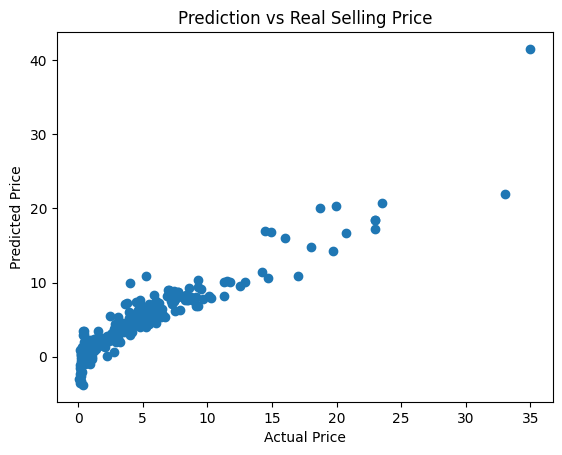

In [9]:
# Creating Visuals:
plt.scatter(y_train, train_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction vs Real Selling Price")
plt.show()

In [10]:
# Predict for test data:
test_predict = lin_reg_model.predict(x_test)
error_test = metrics.r2_score(y_test,test_predict)
error_test

0.8649113014244898

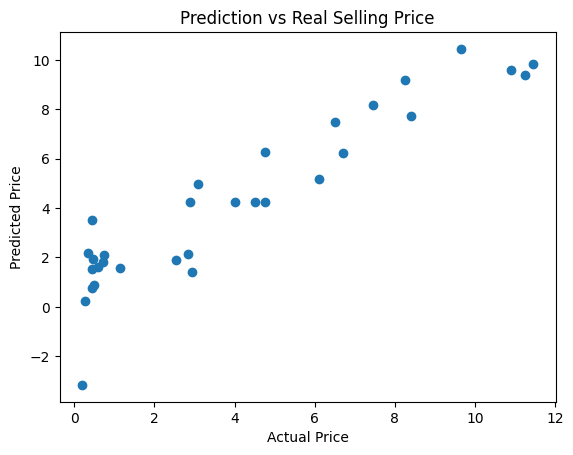

In [11]:
# Creating Visuals:
plt.scatter(y_test, test_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction vs Real Selling Price")
plt.show()

In [12]:
# Model Training using Lasso Regression:

lass_reg_model = Lasso()
lass_reg_model.fit(x_train,y_train)

Lasso()

In [13]:
# Predict on training data
train_predict2 = lass_reg_model.predict(x_train)
error_train2 = metrics.r2_score(y_train,train_predict2)
error_train2

0.8427856123435794

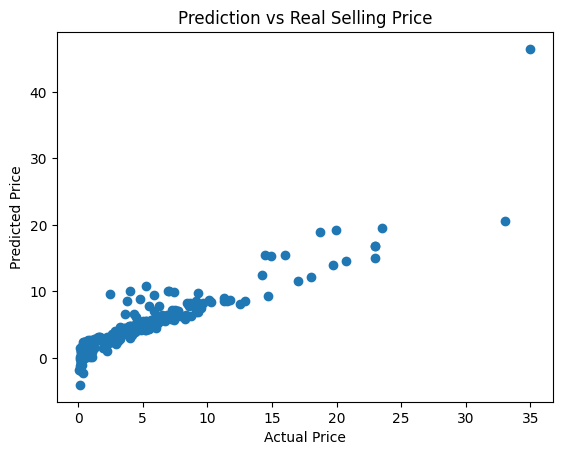

In [14]:
# Creating Visuals:
plt.scatter(y_train, train_predict2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction vs Real Selling Price")
plt.show()

In [15]:
# Predict on test data
test_predict2 = lass_reg_model.predict(x_test)
error_test2 = metrics.r2_score(y_test,test_predict2)
error_test2

0.8709167941173195

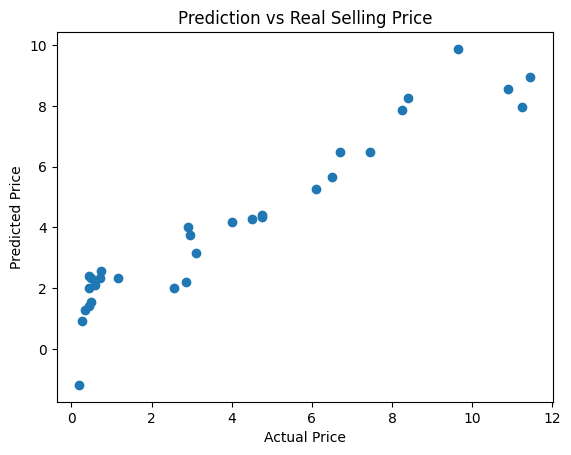

In [16]:
# Creating Visuals:
plt.scatter(y_test, test_predict2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction vs Real Selling Price")
plt.show()